In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv("/content/drive/MyDrive/Video Games Sales - Video Games Sales.csv.csv")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1907.0,953.000000,550.647800,0.00,476.50,953.00,1429.500,1906.00
Rank,1907.0,954.000000,550.647800,1.00,477.50,954.00,1430.500,1907.00
Year,1878.0,2003.766773,5.895369,1983.00,2000.00,2005.00,2008.000,2012.00
North America,1907.0,1.258789,1.956560,0.00,0.51,0.81,1.375,40.43
Europe,1907.0,0.706675,1.148904,0.00,0.23,0.44,0.810,28.39
Japan,1907.0,0.317493,0.724945,0.00,0.00,0.02,0.300,7.20
Rest of World,1907.0,0.206471,0.343093,0.00,0.06,0.13,0.220,8.54
Global,1907.0,2.489240,3.563159,0.83,1.11,1.53,2.540,81.12
Review,1907.0,79.038977,10.616899,30.50,74.00,81.00,86.230,97.00


In [23]:
data.shape

(1907, 13)

In [24]:
missing_value= data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
data_types = data.dtypes
missing_values_table = pd.concat([missing_value, percentage, data_types], axis=1)
miss_val = missing_values_table.rename(columns = {0 : 'Missing Values',1 : 'Percentage',2 : 'Data Types'})
miss_val.style.background_gradient(cmap = "plasma")


,Missing Values,Percentage,Data Types
index,0,0.000000,int64
Rank,0,0.000000,int64
Game Title,0,0.000000,object
Platform,0,0.000000,object
Year,29,1.520713,float64
Genre,0,0.000000,object
Publisher,2,0.104877,object
North America,0,0.000000,float64
Europe,0,0.000000,float64
Japan,0,0.000000,float64


In [25]:
data.dropna(inplace=True)
data.shape

(1878, 13)

In [26]:
data['Year'] = data['Year'].astype('int64')

In [27]:
data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [28]:
data['Publisher'].value_counts()

Electronic Arts                338
Nintendo                       295
Sony Computer Entertainment    156
Activision                     140
Ubisoft                         93
                              ... 
Rising Star Games                1
Sony Online Entertainment        1
Natsume                          1
GameBank                         1
Pinnacle                         1
Name: Publisher, Length: 94, dtype: int64

In [29]:
data['Genre'].value_counts()

Sports          303
Action          272
Shooter         204
Platform        186
Racing          184
Role-Playing    171
Misc            153
Fighting        125
Adventure       105
Simulation       92
Puzzle           44
Strategy         39
Name: Genre, dtype: int64

In [31]:
data['Game Title'].value_counts()

FIFA Soccer 08                                 6
WWE SmackDown vs Raw 2008                      5
The Simpsons Game                              5
Pro Evolution Soccer 2008                      5
LEGO Indiana Jones: The Original Adventures    5
                                              ..
Star Wars: Dark Forces                         1
The 7th Guest                                  1
Crash Nitro Kart                               1
Scribblenauts                                  1
FIFA Soccer World Championship                 1
Name: Game Title, Length: 1505, dtype: int64

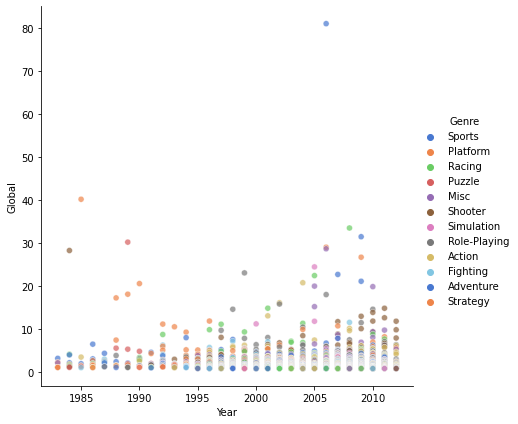

In [34]:
sns_plot = sns.relplot(x="Year", y="Global", hue="Genre", 
                       alpha=.7, palette="muted",
                       height=6, data=data)



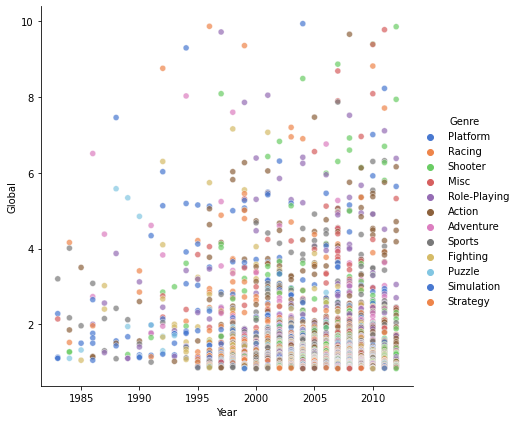

In [37]:
sns_plot = sns.relplot(x="Year", y="Global", hue="Genre",alpha=.7, palette="muted",height=6, data=data[data['Global'] <= 10])

In [39]:
data.groupby('Platform')['Global'].sum().sort_values(ascending=False).head(10)

Platform
PS2     805.08
Wii     580.08
X360    543.30
DS      453.79
PS      447.65
PS3     443.92
NES     213.14
GB      197.98
PC      169.95
GBA     157.05
Name: Global, dtype: float64

Data Validation

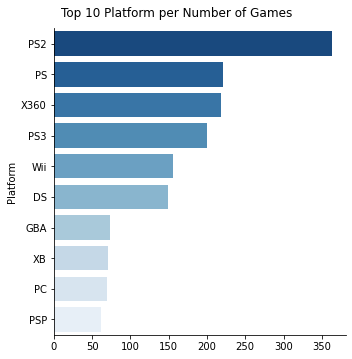

In [42]:
top_10_platform_count = pd.DataFrame(data['Platform'].value_counts()).reset_index()[:10]
top_10_platform_count.columns = ['Platform','Value_counts']

g = sns.catplot(y='Platform',x='Value_counts', data=top_10_platform_count, kind='bar', palette='Blues_r')
g.fig.suptitle('Top 10 Platform per Number of Games', y = 1.03)
g.set(ylabel='Platform',xlabel='')
plt.show()

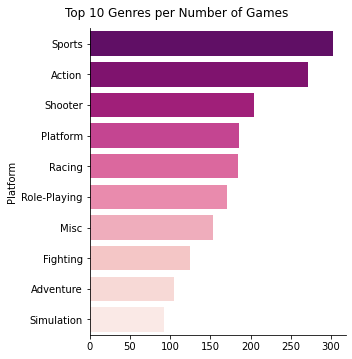

In [43]:
top_10_genres_count = pd.DataFrame(data['Genre'].value_counts()).reset_index()[:10]
top_10_genres_count.columns = ['Genre','Value_counts']
g = sns.catplot(y='Genre',x='Value_counts', data=top_10_genres_count, kind='bar', palette='RdPu_r')
g.fig.suptitle('Top 10 Genres per Number of Games', y = 1.03)
g.set(ylabel='Platform',xlabel='')
plt.show()